## Time-series Analysis & Stationarity Check

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from IPython.display import display
import math

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)


#### Data preparation

In [3]:
df = pd.read_excel("Данные-рус Обработанные.xlsx")
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
3,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
4,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88


In [4]:
# remove first two rows (blank)
df = df.drop(index=df.index[:2]).reset_index(drop=True)
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
2,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88
3,КРС,Сельхозпредприятия,АКТЮБИНСКАЯ ОБЛАСТЬ,554.41,504.35,493.56,445.51,585.79,316.47,469.49,...,1520.51,1747.09,915.8,1851.96,932.63,945.11,1142.92,1637.64,1180.54,1045.69
4,КРС,Сельхозпредприятия,АЛМАТИНСКАЯ ОБЛАСТЬ,178.3,362.86,352.49,451.79,228.32,708.84,280.55,...,1055.43,110.45,188.15,172.63,112.31,134.99,1212.02,260.02,129.38,159.66


In [5]:
# Set the first row as column labels
df.columns = df.iloc[0]  # Assign first row as header
df = df[1:].reset_index(drop=True)  # Drop the first row and reset index
df.sample(5)


,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
523,Яйца,Хозяйства населения,ГШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,...,383.5,463.9,640.9,684.3,652.8,516.8,323.5,281.6,271.6,270.6
397,Молоко,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,2456.7,2590.1,3341.2,3390.4,4269.7,4356.8,4356.8,...,6063,6109.3,6390.8,6580.9,6505.9,6414.2,6110.5,6039.8,5861.9,5829.4
354,Птицы,Крестьянские или фермерские хозяйства,АКТЮБИНСКАЯ ОБЛАСТЬ,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0.7,NaN,1.5
369,Птицы,Крестьянские или фермерские хозяйства,ГШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,...,0.1,0.1,0.1,0,NaN,0.1,NaN,0.2,0,0
176,Свиньи,Хозяйства населения,РЕСПУБЛИКА КАЗАХСТАН,7549.06,6859.82,3953.15,3744.25,3662.84,6170.47,7416.06,...,1978.6,1729.2,1670.1,2477.1,2755.1,2029,1873.3,2608.6,2196.3,2583.8


In [6]:
df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', '    АКМОЛИНСКАЯ ОБЛАСТЬ',
       '    АКТЮБИНСКАЯ ОБЛАСТЬ', '    АЛМАТИНСКАЯ ОБЛАСТЬ',
       '    АТЫРАУСКАЯ ОБЛАСТЬ', '    ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ЖАМБЫЛСКАЯ ОБЛАСТЬ', '    КАРАГАНДИНСКАЯ ОБЛАСТЬ',
       '    КОСТАНАЙСКАЯ ОБЛАСТЬ', '    КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ',
       '    МАНГИСТАУСКАЯ ОБЛАСТЬ', '    ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ПАВЛОДАРСКАЯ ОБЛАСТЬ', '    СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ', '    ГАСТАНА', '    ГАЛМАТЫ',
       '    ГШЫМКЕНТ', '    ТУРКЕСТАНСКАЯ ОБЛАСТЬ', '    ОБЛАСТЬ ЖЕТІСУ',
       '    ОБЛАСТЬ ҰЛЫТАУ', '    ОБЛАСТЬ АБАЙ'], dtype=object)

In [7]:
df["Регион"] = df["Регион"].str.strip()
rename_dict = {
    "ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ", 
    "ГАЛМАТЫ": "ГОРОД АЛМАТЫ",
    "ГАСТАНА": "ГОРОД АСТАНА",
    "ГШЫМКЕНТ": "ГОРОД ШЫМКЕНТ",  
    "ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",  
}

# Rename regions in the index
df["Регион"] = df["Регион"].replace(rename_dict)

df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', 'АКМОЛИНСКАЯ ОБЛАСТЬ',
       'АКТЮБИНСКАЯ ОБЛАСТЬ', 'АЛМАТИНСКАЯ ОБЛАСТЬ', 'АТЫРАУСКАЯ ОБЛАСТЬ',
       'ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ЖАМБЫЛСКАЯ ОБЛАСТЬ',
       'КАРАГАНДИНСКАЯ ОБЛАСТЬ', 'КОСТАНАЙСКАЯ ОБЛАСТЬ',
       'КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ', 'МАНГИСТАУСКАЯ ОБЛАСТЬ',
       'ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ПАВЛОДАРСКАЯ ОБЛАСТЬ',
       'СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       'ГОРОД АСТАНА', 'ГОРОД АЛМАТЫ', 'ГОРОД ШЫМКЕНТ',
       'ТУРКЕСТАНСКАЯ ОБЛАСТЬ', 'ОБЛАСТЬ ЖЕТІСУ', 'ОБЛАСТЬ ҰЛЫТАУ',
       'ОБЛАСТЬ АБАЙ'], dtype=object)

In [8]:
# Filter the df
df = df[df['Показатель'] == "КРС"]
# df = df.drop(columns=["Показатель", "Категория хозяйства"])
df.sample(5)

,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
62,КРС,Хозяйства населения,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,нет,нет,нет,нет,нет,нет,нет,...,5016.4,4833,4870,4745.9,4982.5,4696.6,6962.9,6914.7,7852.7,15528.8
41,КРС,Крестьянские или фермерские хозяйства,ОБЛАСТЬ ЖЕТІСУ,нет,нет,нет,нет,нет,нет,нет,...,4243.2,1249.1,233.9,3125.3,372.2,1019.6,2119.1,1768.8,2042.4,6647.4
7,КРС,Сельхозпредприятия,КАРАГАНДИНСКАЯ ОБЛАСТЬ,40.29,47.49,16.23,39.16,37.99,33.46,25.4,...,91.43,242.05,189.97,167.94,87.91,103.4,191.9,116.85,101.7,153.63
39,КРС,Крестьянские или фермерские хозяйства,ГОРОД ШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,...,77.4,82.9,70.4,238.3,73.6,63.7,71.5,46.9,7,46
26,КРС,Крестьянские или фермерские хозяйства,АТЫРАУСКАЯ ОБЛАСТЬ,343.15,145.05,325.72,264.21,203.92,269.1,198.13,...,377.1,468.5,346.1,569.7,370.1,352.8,487.1,665.2,617.4,1059.9


In [9]:
# Sum only the last two columns, grouped by "Регион"
df_sum = df.groupby("Регион")[df.columns[3:]].sum().reset_index()
df_sum


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
0,АКМОЛИНСКАЯ ОБЛАСТЬ,4455.35,3654.2,4287.08,3923.21,3849.7,4074.13,2221.96,2151.76,2728.61,...,3779.21,3691.05,3574.86,3951.41,2029.47,2412.7,2909.66,2608.27,3649.19,4253.58
1,АКТЮБИНСКАЯ ОБЛАСТЬ,5786.8,5425.85,6578.37,5130.34,5668.0,6705.2,3102.75,3943.24,4956.54,...,6615.11,5874.29,5485.3,7246.46,3784.33,4406.21,5198.02,3894.84,4389.74,10603.99
2,АЛМАТИНСКАЯ ОБЛАСТЬ,6087.47,4454.61,16005.48,3934.04,7098.3,21307.61,3847.95,5545.62,14776.74,...,9201.63,2924.85,4830.75,13686.13,2261.91,5453.39,11705.42,8880.02,5882.78,12400.36
3,АТЫРАУСКАЯ ОБЛАСТЬ,1957.38,1755.18,2085.52,1346.93,2073.99,1946.39,999.31,1623.48,2706.4,...,1487.62,1248.3,1544.7,1559.28,940.75,1640.07,2317.39,2004.6,3124.16,3594.82
4,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,4151.27,6473.64,6837.39,5875.35,5952.33,11066.14,8491.91,6608.14,11514.7,...,2690.83,2194.18,3029.97,5971.67,3593.38,2845.28,5000.88,3396.22,4578.81,9958.4
5,ГОРОД АЛМАТЫ,35.38,14.65,34.19,40.53,36.7,44.31,0.35,8.75,7,...,3.6,3.6,2.6,2.3,0.3,2.3,12.5,4,5.9,18.8
6,ГОРОД АСТАНА,7.48,27.08,13.91,19.11,17.31,21.91,9.83,9.82,10.32,...,3.5,2.7,2.1,2.7,1.7,1.7,3.4,2.6,2,3.6
7,ГОРОД ШЫМКЕНТ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,518.43,523.12,420.32,545.23,375.66,352.82,350.02,466.45,494.05,744.54
8,ЖАМБЫЛСКАЯ ОБЛАСТЬ,2731.22,3109.06,2538.81,3379.88,2921.49,4463.86,2630.68,5015.59,4328.26,...,4104.82,3231.51,3215.25,4352.03,2461.28,4488.08,4264.39,3418.05,5708.5,15350.76
9,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,2406.3,2980.56,3497.07,3061.07,3678.77,6310.46,2782.3,3175.8,4355.38,...,4578.07,3984.34,4216.8,7897.55,3133.14,3873.69,5466.61,3586.35,4578.05,9000.38


In [10]:
# convert date columns to datetime format
df_sum.columns = list(df_sum.columns[:1]) + list(pd.to_datetime(df_sum.columns[-120:]))
df_sum = df_sum.rename(columns={col: col.strftime("%Y-%m-%d") for col in df_sum.columns[-120:]})
df_sum.sample(5)


,Регион,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
17,ПАВЛОДАРСКАЯ ОБЛАСТЬ,2646.74,2934.07,3230.62,2731.05,2830.1,3673.18,4142.17,3487.45,3395.98,...,2741.18,2948.03,3140.46,4609.38,5306.59,4061.35,4014.27,4697.04,5946.29,7538.52
18,РЕСПУБЛИКА КАЗАХСТАН,54388.72,51785.69,63461.82,47989.34,56054.85,85282.84,44086.54,52930.93,79193.35,...,61810.24,48515.81,51645.92,99488.95,44219.81,55841.92,87063.18,63131.0,72560.36,150420.46
0,АКМОЛИНСКАЯ ОБЛАСТЬ,4455.35,3654.2,4287.08,3923.21,3849.7,4074.13,2221.96,2151.76,2728.61,...,3779.21,3691.05,3574.86,3951.41,2029.47,2412.7,2909.66,2608.27,3649.19,4253.58
6,ГОРОД АСТАНА,7.48,27.08,13.91,19.11,17.31,21.91,9.83,9.82,10.32,...,3.5,2.7,2.1,2.7,1.7,1.7,3.4,2.6,2,3.6
16,ОБЛАСТЬ ҰЛЫТАУ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,399.9,179.4,439.25,847.75,99.5,593.1,750.95,507.0,248.25,1142.3


C:\Users\Acer\AppData\Local\Temp\ipykernel_15716\2556932239.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sum.replace("нетнетнет", np.nan, inplace=True)


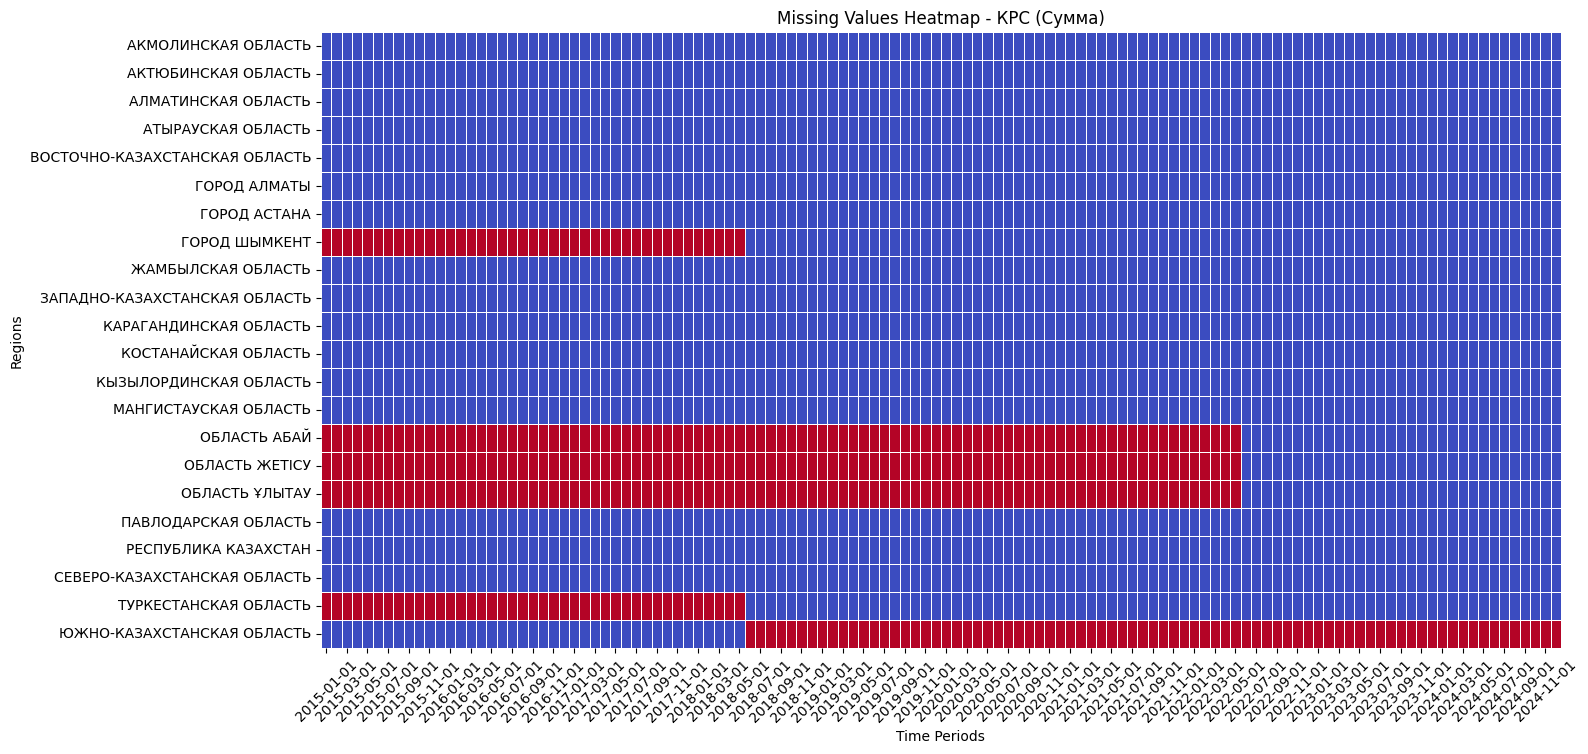

In [11]:
# Replace "нетнетнет" with NaN for easier handling
df_sum.replace("нетнетнет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_sum_numeric = df_sum.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_sum_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - КРС (Сумма)')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Convert from wide format to long format
df_sum_melted = df_sum.melt(id_vars=["Регион"], var_name="Месяц", value_name="Объем")
df_sum_melted.sample(5)

,Регион,Месяц,Объем
1229,СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,2019-08-01,5088.91
109,ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,2015-05-01,7555.39
2042,РЕСПУБЛИКА КАЗАХСТАН,2022-09-01,104764.03
873,ОБЛАСТЬ ЖЕТІСУ,2018-04-01,NaN
489,ГОРОД АЛМАТЫ,2016-11-01,24.42


In [13]:
# Convert date column to datetime
df_sum_melted["Месяц"] = pd.to_datetime(df_sum_melted["Месяц"])

# Set index for time-series analysis
df_sum_melted = df_sum_melted.sort_values(["Регион", "Месяц"]).set_index(["Регион", "Месяц"])

df_sum_melted

Объем
Регион                     Месяц              
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01  4455.35
                           2015-02-01  3654.20
                           2015-03-01  4287.08
                           2015-04-01  3923.21
                           2015-05-01  3849.70
...                                        ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01      NaN
                           2024-09-01      NaN
                           2024-10-01      NaN
                           2024-11-01      NaN
                           2024-12-01      NaN

[2640 rows x 1 columns]

In [14]:
# Replace "нет" with NaN
df_sum_melted = df_sum_melted.replace("нетнетнет", np.nan)
df_sum_melted.isna().groupby("Регион").mean() * 100

,Объем
Регион,
АКМОЛИНСКАЯ ОБЛАСТЬ,0.000000
АКТЮБИНСКАЯ ОБЛАСТЬ,0.000000
АЛМАТИНСКАЯ ОБЛАСТЬ,0.000000
АТЫРАУСКАЯ ОБЛАСТЬ,0.000000
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0.000000
ГОРОД АЛМАТЫ,0.000000
ГОРОД АСТАНА,0.000000
ГОРОД ШЫМКЕНТ,34.166667
ЖАМБЫЛСКАЯ ОБЛАСТЬ,0.000000


In [15]:
# Filter the df
df_shp = df[(df['Показатель'] == "КРС") & (df['Категория хозяйства'] == "Сельхозпредприятия")]
df_shp = df_shp.drop(columns=["Показатель", "Категория хозяйства"])
df_shp = df_shp.sort_values(by="Регион", ascending=True)

df_shp.sample(5)


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
13,СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,218.07,303.24,267.73,280.28,341.49,353.54,372.24,234.7,430.49,...,642.24,554.03,601.03,641.57,547.02,781.65,846.54,888.54,667.25,620.08
15,ГОРОД АСТАНА,2.6,18.7,6.5,11.8,11.4,12.2,1.7,2.77,2.63,...,0,0,0,0,0,0,0,0,0,0
16,ГОРОД АЛМАТЫ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,МАНГИСТАУСКАЯ ОБЛАСТЬ,0,0,0,0,0,0,0,0,0,...,1.68,1.68,151.68,1.68,1.68,1.68,10.14,1.68,2.28,2.08
17,ГОРОД ШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,119.83,104.42,6.12,16.03,9.76,12.12,12.32,159.15,245.15,115.84


C:\Users\Acer\AppData\Local\Temp\ipykernel_15716\2714854409.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_shp.replace("нет", np.nan, inplace=True)


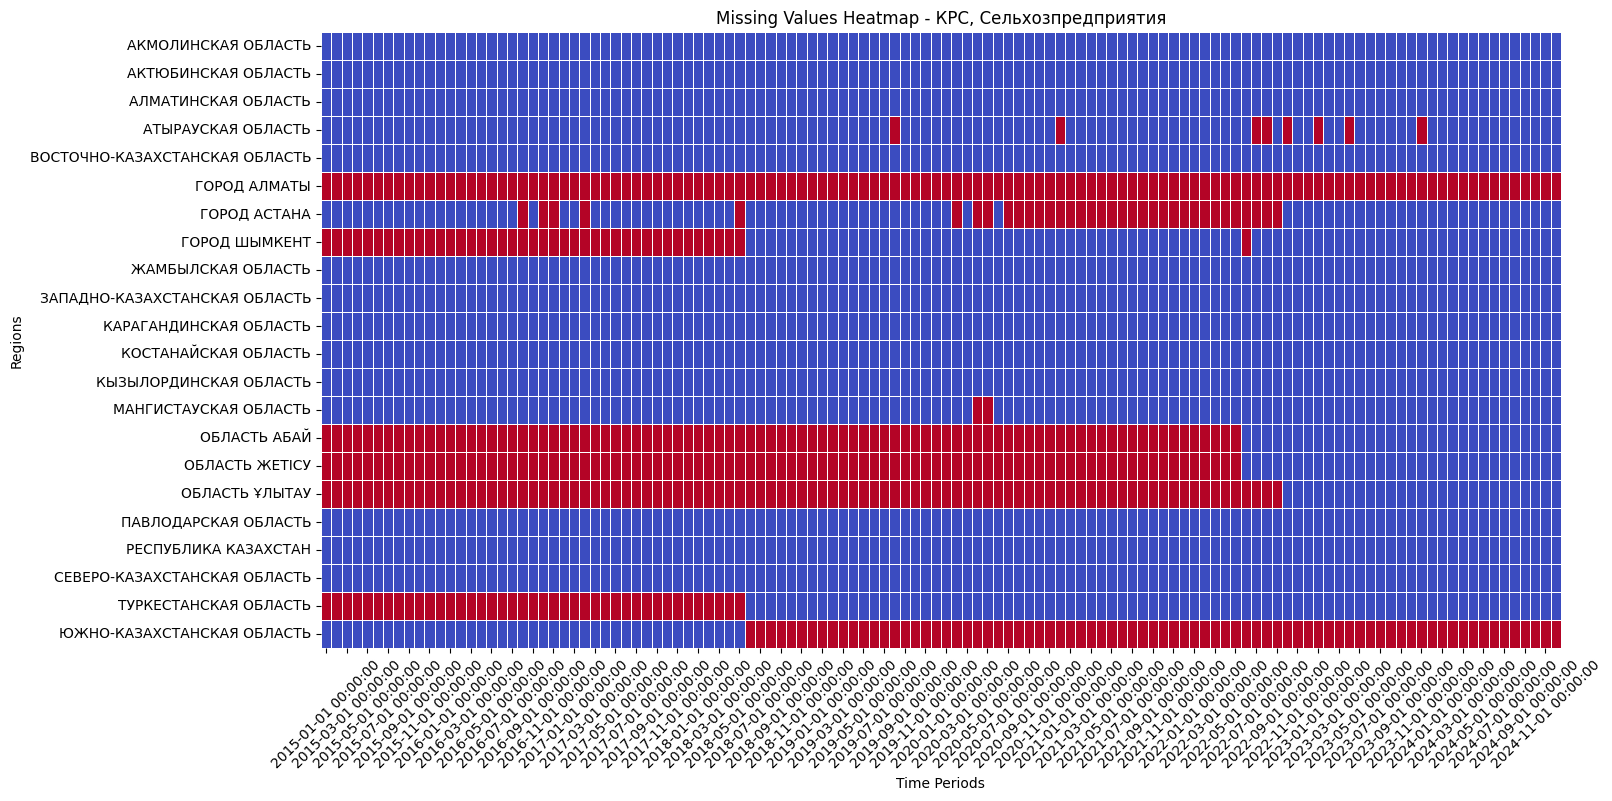

In [16]:
# Replace "нетнетнет" with NaN for easier handling
df_shp.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_shp_numeric = df_shp.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_shp_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - КРС, Сельхозпредприятия')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Filter the df
df_kfh = df[(df['Показатель'] == "КРС") & (df['Категория хозяйства'] == "Крестьянские или фермерские хозяйства")]
df_kfh = df_kfh.drop(columns=["Показатель", "Категория хозяйства"])
df_kfh = df_kfh.sort_values(by="Регион", ascending=True)

df_kfh.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
25,АЛМАТИНСКАЯ ОБЛАСТЬ,1006.07,511.75,6312.49,669.05,615.78,4474.67,820.6,1912.53,1568.1,...,4592.1,1166.8,702,4396,644.2,3061.4,2726.7,2375.7,3392.1,4825.9
31,КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,100.0,89.24,162.92,193.43,99.46,214.1,158.07,203.86,134.16,...,124.3,168.2,168.7,183.5,137.7,103.6,224.1,176.6,294.3,509.4
39,ГОРОД ШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,77.4,82.9,70.4,238.3,73.6,63.7,71.5,46.9,7,46
36,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,1312.24,1921.43,2015.33,1816.9,2005.26,3866,2082.77,2146.81,4042.83,...,906.11,881.62,1031.53,2900.25,757.69,885.09,1463.97,1245.05,1756.9,4661.59
38,ГОРОД АЛМАТЫ,16.13,3.1,8.99,11.48,3.1,9.31,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Acer\AppData\Local\Temp\ipykernel_15716\4047375678.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kfh.replace("нет", np.nan, inplace=True)


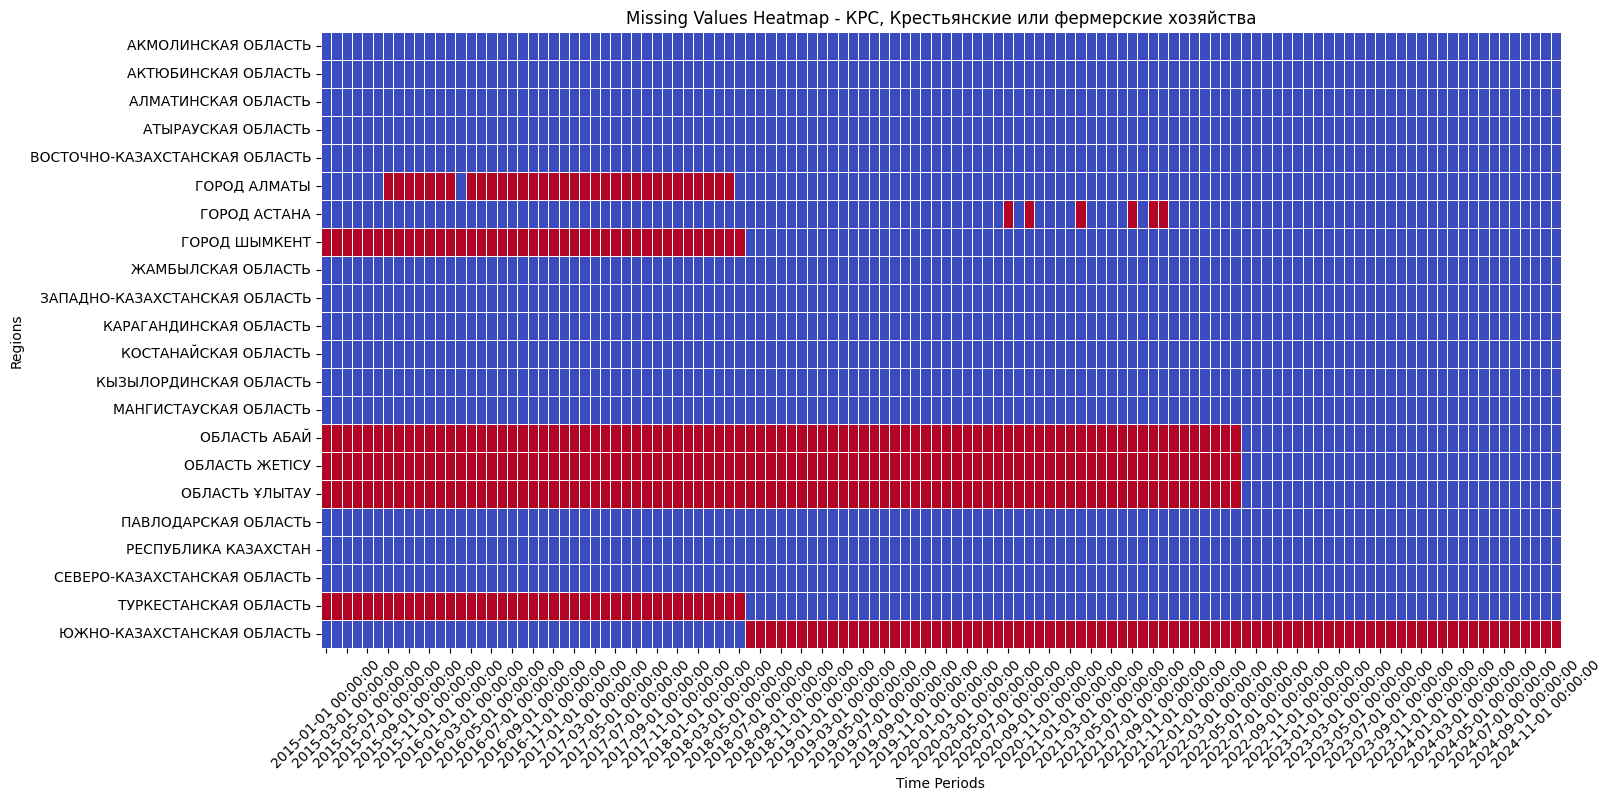

In [18]:
# Replace "нетнетнет" with NaN for easier handling
df_kfh.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_kfh_numeric = df_kfh.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_kfh_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - КРС, Крестьянские или фермерские хозяйства')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Filter the df
df_hn = df[(df['Показатель'] == "КРС") & (df['Категория хозяйства'] == "Хозяйства населения")]
df_hn = df_hn.drop(columns=["Показатель", "Категория хозяйства"])
df_hn = df_hn.sort_values(by="Регион", ascending=True)

df_hn.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
46,АКТЮБИНСКАЯ ОБЛАСТЬ,4709.31,4477.88,5468.37,4137.36,4667.12,5829.45,2107.76,3112.99,3407.33,...,3695.8,2946.7,3545,4554.6,1660.4,2429.4,2409.1,1313.7,1616.2,7664.9
44,РЕСПУБЛИКА КАЗАХСТАН,43997.42,41271.96,45765.33,34850.73,42898.31,60065.37,31661.72,38854.96,59777.51,...,32711.6,25615.8,32695.5,48320,22795.9,29969.9,48114.3,36211,40203.9,84110.2
65,ОБЛАСТЬ АБАЙ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,1221.1,1108,1020.2,2612.1,794.7,1009.4,1406.5,1344.8,2363.5,10247.4
49,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,1585.33,2171.18,2343.9,1650.57,2011.5,3775.73,1897.23,1916.94,2255.96,...,2399.4,1530.2,1791.1,3813.9,1455.5,1735.6,2380.1,1433.4,1895.3,3924.6
50,ЖАМБЫЛСКАЯ ОБЛАСТЬ,2091.25,2262.1,1859.7,2448.13,2208.03,3262.85,2006.73,3745.07,2877.76,...,1725.9,2208.7,1917.5,2946.8,1834.6,3439.9,2926.8,2212.7,3720.6,10471.3


C:\Users\Acer\AppData\Local\Temp\ipykernel_15716\3058276821.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hn.replace("нет", np.nan, inplace=True)


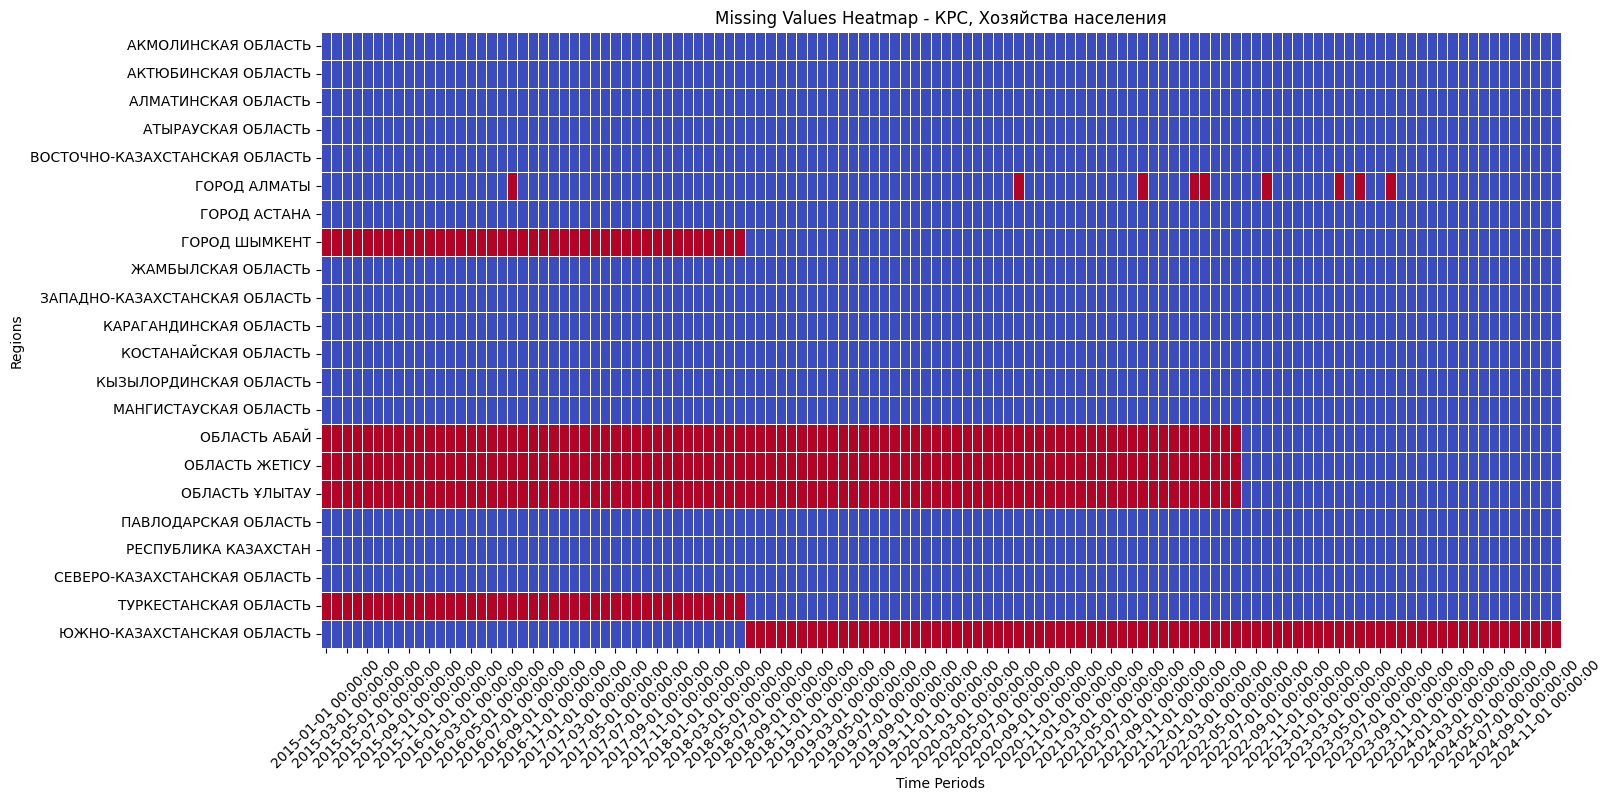

In [20]:
# Replace "нетнетнет" with NaN for easier handling
df_hn.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_hn_numeric = df_hn.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_hn_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - КРС, Хозяйства населения')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [21]:
df_sum_melted

Объем
Регион                     Месяц              
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01  4455.35
                           2015-02-01  3654.20
                           2015-03-01  4287.08
                           2015-04-01  3923.21
                           2015-05-01  3849.70
...                                        ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01      NaN
                           2024-09-01      NaN
                           2024-10-01      NaN
                           2024-11-01      NaN
                           2024-12-01      NaN

[2640 rows x 1 columns]

In [22]:
# Reset index if needed
df_stats = df_sum_melted.reset_index()

# Calculate basic descriptive stats for each region
region_stats = df_stats.groupby("Регион")["Объем"].agg([
    "count", "min", "max", "mean", "median", "std"
]).rename(columns={
    "count": "Кол-во значений",
    "min": "Мин.",
    "max": "Макс.",
    "mean": "Среднее",
    "median": "Медиана",
    "std": "Ст. откл."
})

# Display result
display(region_stats.sort_values(by="Среднее", ascending=False))


,Кол-во значений,Мин.,Макс.,Среднее,Медиана,Ст. откл.
Регион,,,,,,
РЕСПУБЛИКА КАЗАХСТАН,120,39466.27,166768.26,74906.676750,64057.165,28244.642578
АЛМАТИНСКАЯ ОБЛАСТЬ,120,2216.90,29466.37,11861.280833,8992.950,7563.625337
ТУРКЕСТАНСКАЯ ОБЛАСТЬ,79,6093.71,29353.24,10171.251646,9039.420,3517.508042
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,120,1589.72,34372.43,8990.620417,7593.945,6124.333187
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,41,6625.89,15353.75,8558.253659,8102.160,1728.566773
АКТЮБИНСКАЯ ОБЛАСТЬ,120,2532.69,17181.79,6632.705083,5948.700,2826.562394
ОБЛАСТЬ ЖЕТІСУ,31,833.06,13509.90,5838.701935,6626.000,3867.119460
ОБЛАСТЬ АБАЙ,31,1660.06,21192.97,5802.970000,3549.250,4918.217691
ЖАМБЫЛСКАЯ ОБЛАСТЬ,120,2328.74,18563.01,5234.152000,4120.790,3233.533040


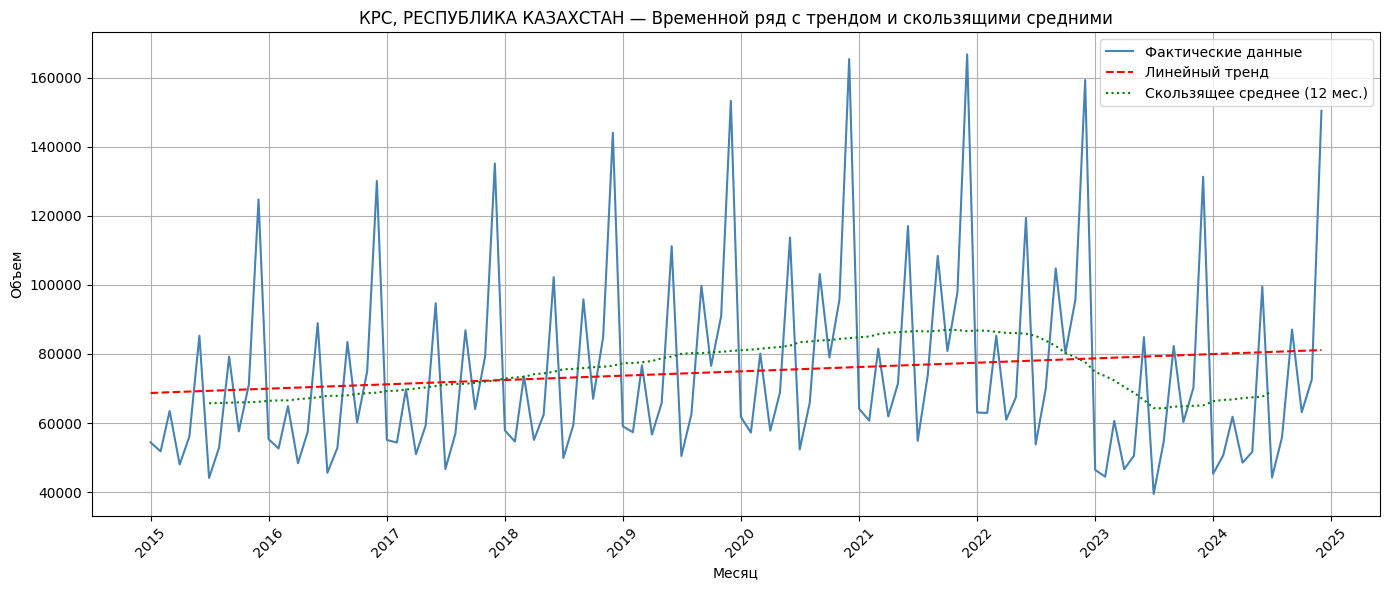

In [23]:
# Filter for national level
national_data = df_stats[df_stats["Регион"] == "РЕСПУБЛИКА КАЗАХСТАН"].copy()

# Ensure 'Месяц' is datetime
national_data["Месяц"] = pd.to_datetime(national_data["Месяц"])

# Create time index as integer (months since start)
national_data = national_data.sort_values("Месяц")
national_data["t"] = range(len(national_data))  # 0, 1, 2, ..., N

# Trend line
coeffs = np.polyfit(national_data["t"], national_data["Объем"], deg=1)
trend = np.poly1d(coeffs)

# Moving Averages
national_data["MA_12"] = national_data["Объем"].rolling(window=12, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))

# Actual data
plt.plot(national_data["Месяц"], national_data["Объем"], label="Фактические данные", color="steelblue")

# Trend line
plt.plot(national_data["Месяц"], trend(national_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# Moving Averages
plt.plot(national_data["Месяц"], national_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# Labels and style
plt.title("КРС, РЕСПУБЛИКА КАЗАХСТАН — Временной ряд с трендом и скользящими средними")
plt.xlabel("Месяц")
plt.ylabel("Объем")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

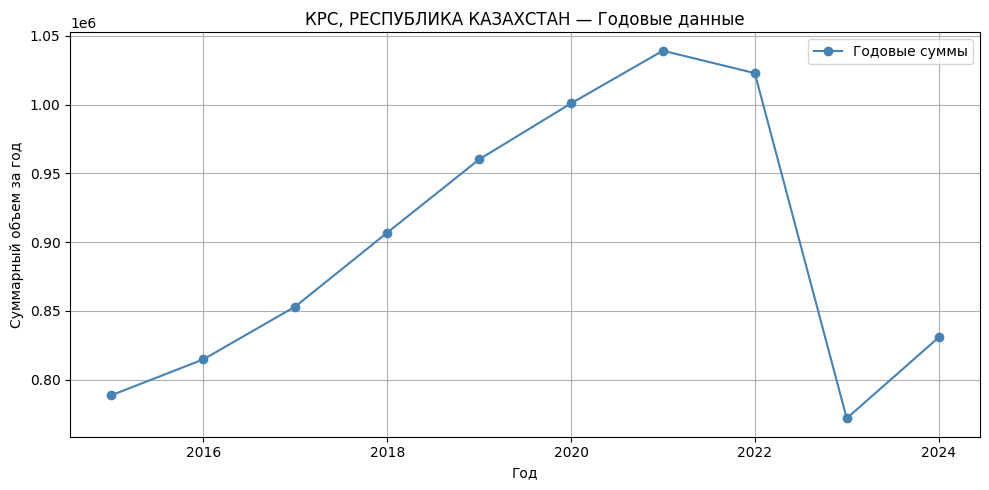

In [24]:
# Aggregate by year (sum)
national_data["Год"] = national_data["Месяц"].dt.year
annual_data = national_data.groupby("Год")["Объем"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))

# Actual yearly data
plt.plot(annual_data["Год"], annual_data["Объем"], marker='o', label="Годовые суммы", color="steelblue")

# Labels and style
plt.title("КРС, РЕСПУБЛИКА КАЗАХСТАН — Годовые данные")
plt.xlabel("Год")
plt.ylabel("Суммарный объем за год")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [48]:
# # Filter for national level
# aktobe_data = df_stats[df_stats["Регион"] == "АКТЮБИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# aktobe_data["Месяц"] = pd.to_datetime(aktobe_data["Месяц"])

# # Create time index as integer (months since start)
# aktobe_data = aktobe_data.sort_values("Месяц")
# aktobe_data["t"] = range(len(aktobe_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(aktobe_data["t"], aktobe_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# aktobe_data["MA_12"] = aktobe_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(aktobe_data["Месяц"], aktobe_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(aktobe_data["Месяц"], trend(aktobe_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(aktobe_data["Месяц"], aktobe_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКТЮБИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [49]:
# # Filter for national level
# akmola_data = df_stats[df_stats["Регион"] == "АКМОЛИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# akmola_data["Месяц"] = pd.to_datetime(akmola_data["Месяц"])

# # Create time index as integer (months since start)
# akmola_data = akmola_data.sort_values("Месяц")
# akmola_data["t"] = range(len(akmola_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(akmola_data["t"], akmola_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# akmola_data["MA_12"] = akmola_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(akmola_data["Месяц"], akmola_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(akmola_data["Месяц"], trend(akmola_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(akmola_data["Месяц"], akmola_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКМОЛИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [50]:
# # Filter for national level
# kyzylorda_data = df_stats[df_stats["Регион"] == "КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# kyzylorda_data["Месяц"] = pd.to_datetime(kyzylorda_data["Месяц"])

# # Create time index as integer (months since start)
# kyzylorda_data = kyzylorda_data.sort_values("Месяц")
# kyzylorda_data["t"] = range(len(kyzylorda_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(kyzylorda_data["t"], kyzylorda_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# kyzylorda_data["MA_12"] = kyzylorda_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(kyzylorda_data["Месяц"], trend(kyzylorda_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()